In [24]:
from sklearn import datasets

In [25]:
boston = datasets.load_boston()

In [26]:
#506 rows, 13 features in the array, actual price of the house

In [27]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [28]:
boston_X = boston.data

In [29]:
boston_X.shape

(506, 13)

In [30]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [31]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [32]:
import numpy as np
from statistics import mean

In [33]:
#Convert to numpy array
X=np.array(boston_X)

In [34]:
#From the 13 features, choose any 1
X=X[:,0]

In [35]:
Y=boston.target

In [36]:
from sklearn import model_selection
#Divide into Train and test
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y)
from sklearn.linear_model import LinearRegression 
alg = LinearRegression()
#Reshape X to for 2D array
X_train = X_train.reshape(-1,1)
alg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
m=alg.coef_[0]
c=alg.intercept_

In [38]:
X_line=np.arange(5,20,0.000001)
Y_line=m*X_line + c

In [39]:
import matplotlib.pyplot as plt

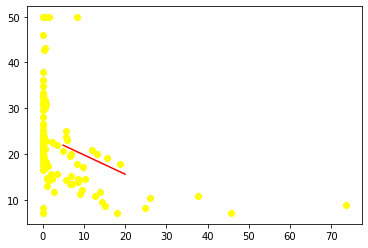

In [40]:
plt.plot(X_line,Y_line,color='red')
X_train=X_train.reshape(379)
#check line with 
plt.scatter(X_test,Y_test,color='yellow')
plt.show()

In [41]:
#Coefficient of Determination
"""CD=1-(u/v)
u=Sum of (Difference of actual value of y and prediction value of y)^2
v=Sum of (Difference of actual value of y and mean of all values of y)^2
If y for all x=Mean, then CD=0, since u=v
If y for all x=target value, then CD=1, since u=0
0<C.D<1
If CD<0, then the prediction is worse than the mean of all y"""

'CD=1-(u/v)\nu=Sum of (Difference of actual value of y and prediction value of y)^2\nv=Sum of (Difference of actual value of y and mean of all values of y)^2\nIf y for all x=Mean, then CD=0, since u=v\nIf y for all x=target value, then CD=1, since u=0\n0<C.D<1\nIf CD<0, then the prediction is worse than the mean of all y'

In [42]:
def best_fit_slope_and_intercept(xs,zs):
    m=(((mean(xs) * mean(zs)) - mean(xs*zs)) / ((mean(xs)**2) - mean(xs**2)))
    b= mean(zs) - m*mean(xs)
    return m,b

In [43]:
def squared_error(zs_orig,zs_line):
    return sum((zs_line-zs_orig)**2)

In [44]:
def coefficient_of_determination(zs_orig,zs_line):
    z_mean_line=[mean(zs_orig) for z in zs_orig]
    squared_error_reqr = squared_error(zs_orig, zs_line)
    squared_error_z_mean = squared_error(zs_orig,z_mean_line)
    return 1-(squared_error_reqr/squared_error_z_mean)

In [45]:
X_train = X_train.reshape(379)
print(X_train.shape)
print(Y_train.shape)
m,b=best_fit_slope_and_intercept(X_train,Y_train)
print(m,b)

(379,)
(379,)
-0.4214515146388833 24.02284008050873


In [46]:
regression_line=[(m*x)+b for x in X_train]
r_squared = coefficient_of_determination(Y_train,regression_line)
print("Coefficient of Determination:")
print(r_squared)
print("Line coefficients are:")
print(best_fit_slope_and_intercept(X_train,Y_train))

Coefficient of Determination:
0.14701629691786566
Line coefficients are:
(-0.4214515146388833, 24.02284008050873)
